In [1]:
#read params
# process data


In [65]:
import os
import yaml
import pandas as pd
import numpy as np
import argparse
from sklearn.model_selection import train_test_split

class process_data:
    
    def get_data_func(self, data_path):
        df = pd.read_csv("../" + data_path, sep=',')
        return df
    
    def split_train_test_func(self, config_path):
        train_path = config_path['split_data']["train_path"]
        test_path = config_path['split_data']["test_path"]
        random_state = config_path['base']["random_state"]
        load_path = config_path['load_data']["raw_dataset_csv"]
        df = pd.read_csv("../" + load_path, sep=",")
        test_size = config_path['split_data']["test_size"]
        train, test = train_test_split(df, random_state = random_state, test_size=test_size)
        train.to_csv("../" + train_path, index=False, sep=',')
        test.to_csv("../" + test_path, index=False, sep=',')
    
    def split_raw_data(self, df, config_path):
        cols = [col.replace(' ', '_') for col in df.columns]
        print(cols)
        df.to_csv("../"+ config_path, index=False, header=cols, sep=',')

    def __init__(self, path=''):
        if(path == ''):
            self.path = 'params.yaml'
        self.raw_data = dict()
        with open('../' + self.path) as f:
            self.raw_data  = yaml.safe_load(f)
        print(self.raw_data)
        df = self.get_data_func(self.raw_data['data_source']['s3_source'])
        self.split_raw_data(df, self.raw_data['load_data']['raw_dataset_csv'])
        self.split_train_test_func(self.raw_data)


In [66]:
process_data()

{'base': {'project': 'winequality-project', 'random_state': 42, 'target_col': 'TARGET'}, 'data_source': {'s3_source': 'data_given/winequality.csv'}, 'load_data': {'raw_dataset_csv': 'data/raw/winequality.csv'}, 'split_data': {'train_path': 'data/processed/train_winequality.csv', 'test_path': 'data/processed/test_winequality.csv', 'test_size': 0.3}, 'estimators': {'ElasticNet': {'params': {'alpha': 0.9, 'l1_ratio': 0.4}}}, 'model_dir': 'saved_models'}
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'TARGET']


In [44]:
"a a".replace(" ", "_")

'a_a'

In [73]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv('../data/raw/winequality.csv', sep=',')

In [76]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
df['TARGET'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [144]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [183]:
columns_to_keep = ['alcohol', 'sulphates', 'total_sulfur_dioxide','volatile_acidity','TARGET']
df[columns_to_keep].corr()

,alcohol,sulphates,total_sulfur_dioxide,volatile_acidity,TARGET
alcohol,1.000000,0.093595,-0.205654,-0.202288,0.476166
sulphates,0.093595,1.000000,0.042947,-0.260987,0.251397
total_sulfur_dioxide,-0.205654,0.042947,1.000000,0.076470,-0.185100
volatile_acidity,-0.202288,-0.260987,0.076470,1.000000,-0.390558
TARGET,0.476166,0.251397,-0.185100,-0.390558,1.000000


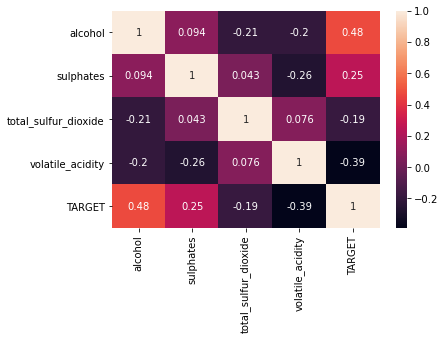

In [184]:
sns.heatmap(df[columns_to_keep].corr(), annot=True)

## Alocohol has greatest relation with target

In [389]:
df_train = pd.read_csv('../data/processed/train_winequality.csv')
df_test = pd.read_csv('../data/processed/test_winequality.csv')

In [138]:
df_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
1,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5
2,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
4,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8,5


In [160]:
X_train

,alcohol,sulphates,total_sulfur_dioxide,volatile_acidity
0,11.0,0.87,77.0,0.220
1,10.2,0.87,15.0,0.460
2,11.0,0.71,78.0,0.540
3,11.4,0.49,48.0,0.670
4,9.8,0.59,60.0,0.580
...,...,...,...,...
1114,10.4,0.63,10.0,0.600
1115,10.9,0.75,60.0,0.635
1116,9.5,0.54,85.0,0.620
1117,11.9,0.80,15.0,0.200


In [185]:
X_train = df_train[columns_to_keep].drop('TARGET', axis=1)
X_test = df_test[columns_to_keep].drop('TARGET', axis=1)
y_train = df_train['TARGET']
y_test = df_test['TARGET']

In [200]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet
import json
import joblib

In [187]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [188]:
alpha = 0.9
l1_ratio = 0.4

In [189]:
lr = ElasticNet(alpha=0.9, l1_ratio=0.4, random_state=42)

lr.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.9, l1_ratio=0.4, random_state=42)

In [190]:
pred_target = lr.predict(X_test_scaled)

In [191]:
r2_score(y_test, pred_target)
mean_absolute_error(y_test, pred_target)

0.6678995437957096

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [214]:
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [215]:
pred_rd_t = rf.predict(X_test_scaled)
r2 = r2_score(y_test, pred_rd_t)
mae = mean_absolute_error(y_test, pred_rd_t)

In [216]:
1 - ((y_test - pred_rd_t) ** 2).sum()  / ((y_test - y_test.mean()) ** 2).sum()

0.4022960179081183

In [217]:
print(np.sqrt(mean_squared_error(y_test, pred_rd_t)))
print(r2) 
print(mae)

0.6155959172487527
0.4022960179081183
0.4502777777777778


In [133]:
scores_file = "../report/scores.json"
params_file = "../report/params.json"

with open(scores_file, "w") as f:
    scores = {
            "rmse": rmse,
            "mae": mae,
            "r2": r2
    }
    json.dump(scores, f, indent=4)

with open(params_file, "w") as f:
    params = {
            "alpha": alpha,
            "l1_ratio": l1_ratio,
    }
    json.dump(params, f, indent=4)

In [136]:
joblib.dump(lr, "../saved_models/model.joblib")

['../saved_models/model.joblib']

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [231]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

In [228]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [290]:
parameters = {
    'rf__n_estimators':[80,90,100]
}

In [291]:
gcv = GridSearchCV(pipe, parameters, cv=4, verbose=1)

In [292]:
gcv.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.4s finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'rf__n_estimators': [80, 90, 100]}, verbose=1)

In [293]:
pipe_test = gcv.predict(X_test)

In [294]:
print(np.sqrt(mean_squared_error(y_test, pipe_test)))
print(r2_score(y_test, pipe_test)) 
print(mean_absolute_error(y_test, pipe_test))

0.6131965427169335
0.4069462140348715
0.4513333333333333


In [296]:
gcv.cv_results_

{'mean_fit_time': array([0.40922493, 0.42731535, 0.46524888]),
 'std_fit_time': array([0.02963989, 0.01412442, 0.01821388]),
 'mean_score_time': array([0.01871043, 0.02045983, 0.01623958]),
 'std_score_time': array([0.00543488, 0.00711633, 0.00105612]),
 'param_rf__n_estimators': masked_array(data=[80, 90, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'rf__n_estimators': 80},
  {'rf__n_estimators': 90},
  {'rf__n_estimators': 100}],
 'split0_test_score': array([0.48379266, 0.48200398, 0.48326234]),
 'split1_test_score': array([0.31234999, 0.31757029, 0.32056153]),
 'split2_test_score': array([0.42398022, 0.42273239, 0.42556027]),
 'split3_test_score': array([0.44116042, 0.44472157, 0.44713415]),
 'mean_test_score': array([0.41532082, 0.41675706, 0.41912957]),
 'std_test_score': array([0.06331283, 0.06105918, 0.06052743]),
 'rank_test_score': array([3, 2, 1])}

In [302]:
import joblib
joblib.dump(gcv, '../saved_models/gridsearch.joblib')

['../saved_models/gridsearch.joblib']

In [303]:
gcv_new = joblib.load('../saved_models/gridsearch.joblib')

In [372]:
pipe_test = gcv_new.predict(X_test)
print('RMSE ',np.sqrt(mean_squared_error(y_test, pipe_test)))
print('R2 ',r2_score(y_test, pipe_test)) 
print('MAE ', mean_absolute_error(y_test, pipe_test))

RMSE  0.6131965427169335
R2  0.4069462140348715
MAE  0.4513333333333333


In [308]:
GridSearchCV?

In [316]:
schema_dict = {"max":df.max(),"min":df.min()}
import json

In [331]:
df.describe().T[['min','max']].to_json('../schema/schema.json')

In [336]:
X_test.sample(n=10, random_state=42).to_csv('../tests/test_data.csv')

# sd

In [ ]:
import os
import yaml
import pandas as pd
import numpy as np
import argparse
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

class prediction:
    
    def __init__():
        self.raw_data = dict()
        self.path = 'params.yaml'
        with open(self.path) as f:
            self.raw_data  = yaml.safe_load(f)
            #print("as")
        self.predict_func(self.raw_data)
    
    def predict_func(self, config):
        random_state = config["base"]["random_state"]
        model_dir = config["model_dir"]
        model_path = os.path.join(model_dir, "model.joblib")
        model = joblib.load(model_path)
        
        test_data_path = config["test_data"]["test_data_csv"]
        test_result_path = config["test_data"]["test_result.csv"]
        X_test = pd.read_csv(test_data_path)
        
        pred = model.predict(X_test)
        
        pd.DataFrame({"TARGET": pred}).to_csv()

In [343]:
y_train.shape

(1119,)

In [345]:
d = {"result": [1,3,4]}

In [346]:
type(d)

dict

In [347]:
pd.DataFrame(d)

,result
0,1
1,3
2,4


In [359]:
d = [1,2,3]

In [357]:
d = d.(2)

In [373]:
#pred = model.predict(X_test[columns])
X_test['TARGET'] = pipe_test
X_test['TARGET'] = X_test['TARGET'].apply( lambda x : round(x) )

In [392]:
X_test.to_dict('list')

{'alcohol': [9.6,
  9.5,
  9.9,
  9.8,
  10.6,
  9.4,
  9.7,
  10.0,
  9.8,
  10.9,
  11.8,
  9.95,
  9.7,
  9.2,
  9.4,
  12.3,
  10.1,
  10.0,
  11.7,
  9.6,
  10.9,
  9.0,
  12.1,
  12.8,
  9.8,
  9.5,
  12.0,
  10.4,
  9.4,
  10.1,
  9.8,
  10.1,
  9.6,
  10.0,
  9.9,
  9.3,
  11.2,
  10.6,
  10.4,
  11.5,
  9.9,
  9.4,
  10.5,
  9.8,
  9.4,
  10.5,
  10.8,
  9.3,
  10.9,
  10.4,
  9.3,
  9.0,
  11.0,
  12.9,
  9.3,
  9.1,
  11.2,
  10.3,
  10.9,
  9.8,
  10.0,
  10.6,
  9.2,
  9.4,
  11.9,
  9.2,
  11.8,
  9.7,
  11.9,
  9.5,
  12.6,
  9.4,
  9.4,
  11.2,
  12.0,
  9.4,
  14.0,
  11.0,
  12.5,
  11.8,
  9.8,
  12.0,
  9.7,
  10.7,
  10.7,
  12.1,
  9.7,
  11.1,
  11.2,
  10.0,
  11.8,
  11.3,
  11.4,
  11.4,
  9.2,
  9.5,
  9.8,
  9.9,
  10.0,
  10.0,
  9.9,
  9.4,
  10.9,
  10.8,
  10.75,
  11.0,
  9.2,
  10.1,
  12.1,
  9.3,
  14.0,
  9.2,
  10.2,
  9.3,
  10.4,
  9.9,
  12.9,
  10.0,
  9.4,
  11.5,
  12.0,
  9.4,
  9.9,
  10.6,
  9.4,
  9.5,
  11.0,
  10.5,
  10.5,
  11.2,
  9.